In [1]:
import pandas as pd
import numpy as np

In [2]:
df1 = pd.read_excel("./Lab Session Data.xlsx", sheet_name = None)

In [3]:
df = df1['Purchase data'].iloc[:,0:5]
df

,Customer,Candies (#),Mangoes (Kg),Milk Packets (#),Payment (Rs)
0,C_1,20,6,2,386
1,C_2,16,3,6,289
2,C_3,27,6,2,393
3,C_4,19,1,2,110
4,C_5,24,4,2,280
5,C_6,22,1,5,167
6,C_7,15,4,2,271
7,C_8,18,4,2,274
8,C_9,21,1,4,148
9,C_10,16,2,4,198


In [4]:
A = df[['Candies (#)', 'Mangoes (Kg)', 'Milk Packets (#)']].fillna(0).values


In [5]:
C = df[['Payment (Rs)']].values


In [6]:

Dimensionality = A.shape[1]
print(f"Dimensionality of the vector space is {Dimensionality}")

Dimensionality of the vector space is 3


In [7]:
Num_of_vectors = A.shape[0]
print(f"Number of vectors  is {Num_of_vectors}")

Number of vectors  is 10


In [8]:
rank = np.linalg.matrix_rank(A)
print(f"Rank is {rank}")

Rank is 3


In [9]:
A_pseudo_inverse = np.linalg.pinv(A)
x = A_pseudo_inverse.dot(C)  #linear equations AX=C using the pseudo-inverse of matrix A
print("Costs are : ")
for cost in x:
    print(f"{cost[0]:.2f}")

Costs are : 
1.00
55.00
18.00


***Mark all customers (in “Purchase Data” table) with payments above Rs. 200 as RICH and others 
as POOR.Develop a classifier model to categorize customers into RICH or POOR class based on 
purchase behavior***

In [11]:
mask = df['Payment (Rs)'] > 200
df['class'] = mask.map({True: 'RICH' , False: 'POOR'})

In [12]:
df

,Customer,Candies (#),Mangoes (Kg),Milk Packets (#),Payment (Rs),class
0,C_1,20,6,2,386,RICH
1,C_2,16,3,6,289,RICH
2,C_3,27,6,2,393,RICH
3,C_4,19,1,2,110,POOR
4,C_5,24,4,2,280,RICH
5,C_6,22,1,5,167,POOR
6,C_7,15,4,2,271,RICH
7,C_8,18,4,2,274,RICH
8,C_9,21,1,4,148,POOR
9,C_10,16,2,4,198,POOR


***IRCTC Stock Price***

In [14]:
df_IRCTC = pd.read_excel("./Lab Session Data.xlsx", sheet_name = None)

In [15]:
df_IRCTC = df1['IRCTC Stock Price'].iloc[:,0:9]
df_IRCTC

,Date,Month,Day,Price,Open,High,Low,Volume,Chg%
0,"Jun 29, 2021",Jun,Tue,2081.85,2092.00,2126.90,2065.05,1.67M,0.0020
1,"Jun 28, 2021",Jun,Mon,2077.75,2084.00,2112.45,2068.40,707.73K,0.0043
2,"Jun 25, 2021",Jun,Fri,2068.85,2084.35,2088.50,2053.10,475.82K,-0.0020
3,"Jun 24, 2021",Jun,Thu,2072.95,2098.00,2098.00,2066.00,541.51K,-0.0026
4,"Jun 23, 2021",Jun,Wed,2078.25,2102.00,2111.40,2072.00,809.62K,-0.0023
...,...,...,...,...,...,...,...,...,...
244,"Jul 07, 2020",Jul,Tue,1397.40,1410.00,1411.00,1390.05,480.21K,-0.0024
245,"Jul 06, 2020",Jul,Mon,1400.75,1405.50,1415.50,1394.00,614.93K,-0.0031
246,"Jul 03, 2020",Jul,Fri,1405.10,1415.00,1425.00,1398.00,599.49K,-0.0051
247,"Jul 02, 2020",Jul,Thu,1412.35,1440.00,1467.80,1395.30,2.16M,0.0362


In [16]:
import statistics as sts

In [17]:
price_data = df_IRCTC['Price']

In [18]:
mean = sts.mean(price_data)
variance = sts.variance(price_data)
print(f" Mean is :{mean}")
print(f" Variance is : {variance}")

 Mean is :1560.663453815261
 Variance is : 58732.365352539186


In [19]:
df_IRCTC['Date'] = pd.to_datetime(df_IRCTC['Date'])

In [20]:
wednesday_data = df_IRCTC[df_IRCTC['Date'].dt.weekday==2]


In [21]:
wednesday_mean = sts.mean(wednesday_data['Price'])
wednesday_mean

1550.706

In [22]:
april_data = df_IRCTC[df_IRCTC['Date'].dt.month==3]


In [23]:
april_mean = sts.mean(april_data['Price'])
april_mean

1875.7904761904763

In [24]:
change_data = df_IRCTC['Chg%']

In [25]:
losses = len(list(filter(lambda x:x<0, change_data)))
total_days = len(change_data)
prob = losses / total_days
print(f"Probability of losses is : {prob}")

Probability of losses is : 0.4979919678714859


In [26]:
num_of_wed = len(df_IRCTC[df_IRCTC['Date'].dt.weekday==2])
num_of_wed_profit = len(list(filter(lambda x:x>0, wednesday_data['Chg%'])))
probab_profit_wednesday = num_of_wed_profit / num_of_wed
print(f"Conditional Probability of making a profit on Wednesday is : {probab_profit_wednesday}")

Conditional Probability of making a profit on Wednesday is : 0.42


In [27]:
import matplotlib.pyplot as plt

In [28]:
df_IRCTC['DayOfWeek'] = df_IRCTC['Date'].dt.dayofweek

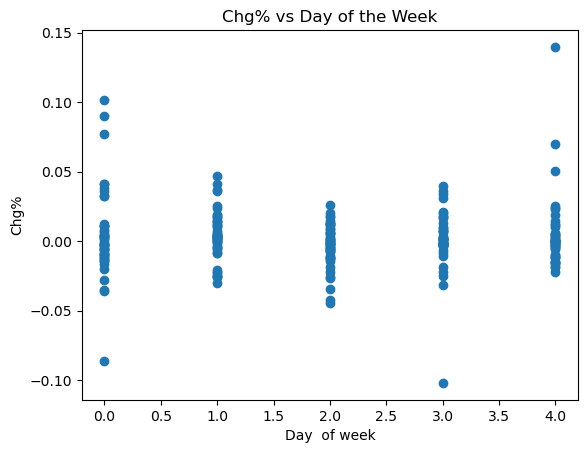

In [29]:
plt.scatter(df_IRCTC['DayOfWeek'] , df_IRCTC['Chg%'])
plt.xlabel('Day  of week')
plt.ylabel('Chg%')
plt.title('Chg% vs Day of the Week')
plt.show()

***Data Exploration: Load the data available in “thyroid0387_UCI” worksheet. Perform the 
following tasks***

In [31]:
thyroid_df = pd.read_excel("./Lab Session Data.xlsx", sheet_name='thyroid0387_UCI')


In [32]:
numeric_columns = thyroid_df.select_dtypes(include=['number']).columns
categorical_columns = thyroid_df.select_dtypes(include=['object']).columns

print("Numeric Columns:", numeric_columns)
print()
print("Categorical Columns:", categorical_columns)

Numeric Columns: Index(['Record ID', 'age'], dtype='object')

Categorical Columns: Index(['sex', 'on thyroxine', 'query on thyroxine',
       'on antithyroid medication', 'sick', 'pregnant', 'thyroid surgery',
       'I131 treatment', 'query hypothyroid', 'query hyperthyroid', 'lithium',
       'goitre', 'tumor', 'hypopituitary', 'psych', 'TSH measured', 'TSH',
       'T3 measured', 'T3', 'TT4 measured', 'TT4', 'T4U measured', 'T4U',
       'FTI measured', 'FTI', 'TBG measured', 'TBG', 'referral source',
       'Condition'],
      dtype='object')


In [33]:
thyroid_df.replace("?",np.nan,inplace = True)

C:\Users\yadav\AppData\Local\Temp\ipykernel_6892\1398544354.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  thyroid_df.replace("?",np.nan,inplace = True)


In [34]:
numeric_df = thyroid_df.select_dtypes(include=['number'])
numeric_df.head()

,Record ID,age,TSH,T3,TT4,T4U,FTI,TBG
0,840801013,29,0.3,NaN,NaN,NaN,NaN,NaN
1,840801014,29,1.6,1.9,128.0,NaN,NaN,NaN
2,840801042,41,NaN,NaN,NaN,NaN,NaN,11.0
3,840803046,36,NaN,NaN,NaN,NaN,NaN,26.0
4,840803047,32,NaN,NaN,NaN,NaN,NaN,36.0


In [35]:
def getrange_emptycount(colname):
    print(colname,"range:", numeric_df[colname].max() - numeric_df[colname].min())
    print(colname,"emptycount:",numeric_df[colname].isnull().sum(),"\n")

In [36]:
for column in numeric_df.columns:
    getrange_emptycount(column)

Record ID range: 29318022
Record ID emptycount: 0 

age range: 65525
age emptycount: 0 

TSH range: 529.995
TSH emptycount: 842 

T3 range: 17.95
T3 emptycount: 2604 

TT4 range: 598.0
TT4 emptycount: 442 

T4U range: 2.16
T4U emptycount: 809 

FTI range: 879.6
FTI emptycount: 802 

TBG range: 199.9
TBG emptycount: 8823 



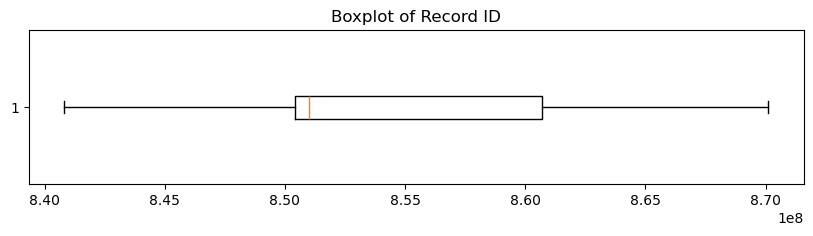

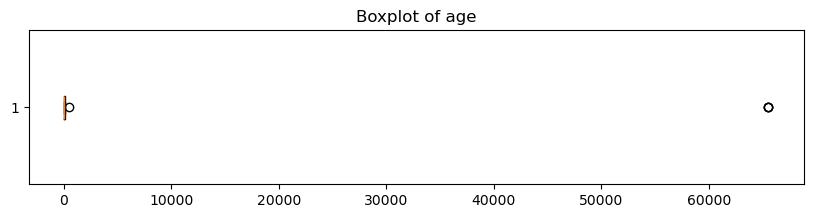

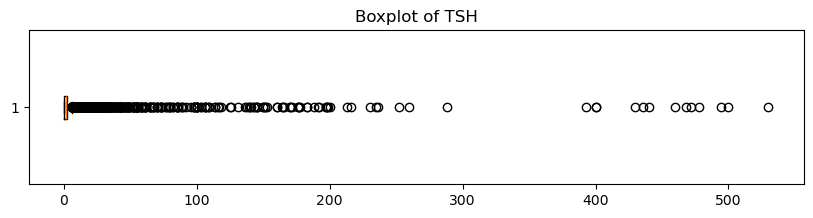

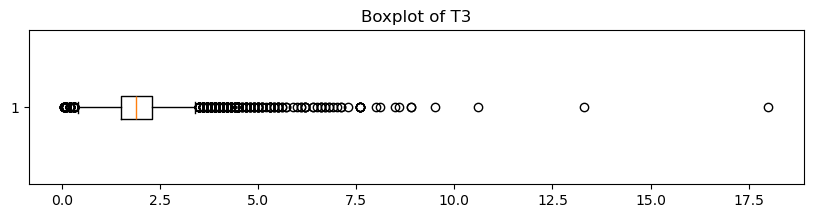

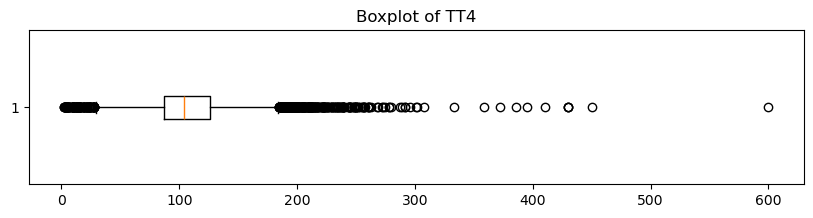

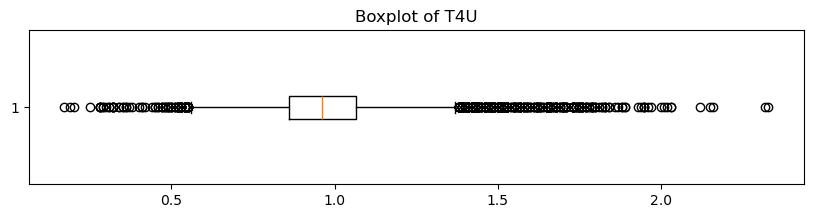

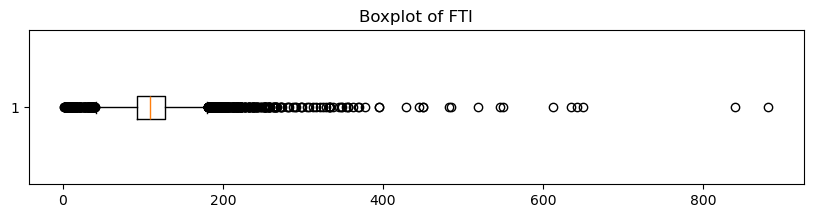

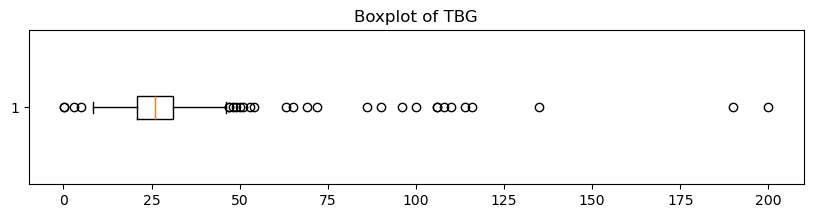

In [37]:
for column in numeric_df:
    plt.figure(figsize=(10, 2))
    plt.boxplot(thyroid_df[column].dropna(), vert=False)
    plt.title(f"Boxplot of {column}")
    plt.show()

In [38]:
def mean_variance(column):
    print(column,"\nmean:",numeric_df[column].mean(),"\nvariance:",numeric_df[column].var(),"\n")

In [39]:
for column in numeric_df.columns:
    mean_variance(column)

Record ID 
mean: 852947346.6122983 
variance: 57486250586150.34 

age 
mean: 73.55582206716092 
variance: 1401800.8688713463 

TSH 
mean: 5.218402753781513 
variance: 584.866153209295 

T3 
mean: 1.970628805724726 
variance: 0.7877961683561565 

TT4 
mean: 108.70030469644902 
variance: 1407.950791475491 

T4U 
mean: 0.9760557216309935 
variance: 0.04014430639006391 

FTI 
mean: 113.64074551935484 
variance: 1726.539585061158 

TBG 
mean: 29.87005729512894 
variance: 444.38764299946627 



***employ appropriate central tendencies to fill the missing values in the data 
variables. Employ following guidance.
• Mean may be used when the attribute is numeric with no outliers
• Median may be employed for attributes which are numeric and contain outliers
• Mode may be employed for categorical attributes***

In [80]:
for column in thyroid_df.columns:
    if thyroid_df[column].isnull().sum() > 0:
        if thyroid_df[column].dtype == 'object':
            thyroid_df[column].fillna(thyroid_df[column].mode()[0], inplace=True)
        else:
            if thyroid_df[column].nunique() > 10:  # assuming outliers present if unique values > 10
                thyroid_df[column].fillna(thyroid_df[column].median(), inplace=True)
            else:
                thyroid_df[column].fillna(thyroid_df[column].mean(), inplace=True)
thyroid_df.head()

,Record ID,age,sex,on thyroxine,query on thyroxine,on antithyroid medication,sick,pregnant,thyroid surgery,I131 treatment,...,TT4 measured,TT4,T4U measured,T4U,FTI measured,FTI,TBG measured,TBG,referral source,Condition
0,840801013,29,F,f,f,f,f,f,f,f,...,f,104.0,f,0.96,f,109.0,f,26.0,other,NO CONDITION
1,840801014,29,F,f,f,f,f,f,f,f,...,t,128.0,f,0.96,f,109.0,f,26.0,other,NO CONDITION
2,840801042,41,F,f,f,f,f,f,f,f,...,f,104.0,f,0.96,f,109.0,t,11.0,other,NO CONDITION
3,840803046,36,F,f,f,f,f,f,f,f,...,f,104.0,f,0.96,f,109.0,t,26.0,other,NO CONDITION
4,840803047,32,F,f,f,f,f,f,f,f,...,f,104.0,f,0.96,f,109.0,t,36.0,other,S
